In [1]:
import pandas as pd
df=pd.read_csv("hearing_test (1).csv")

In [2]:
df.head(23)

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1
5,58.0,23.0,0
6,66.0,28.9,0
7,38.0,41.1,1
8,53.0,32.0,0
9,43.0,41.5,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [4]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [5]:
import seaborn as sns


In [6]:
df["test_result"].value_counts()

test_result
1    3000
0    2000
Name: count, dtype: int64

<Axes: xlabel='test_result', ylabel='count'>

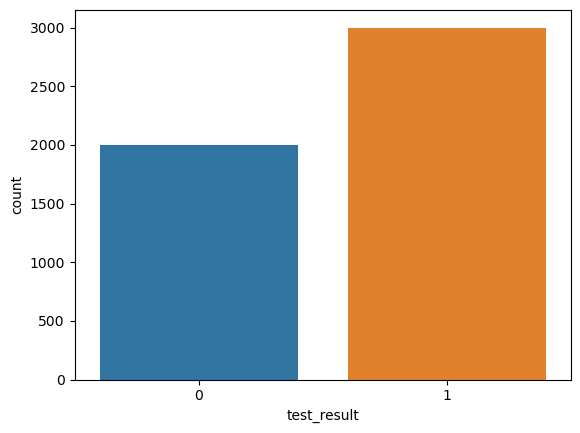

In [7]:
sns.countplot(x="test_result",data=df)

<Axes: xlabel='physical_score', ylabel='age'>

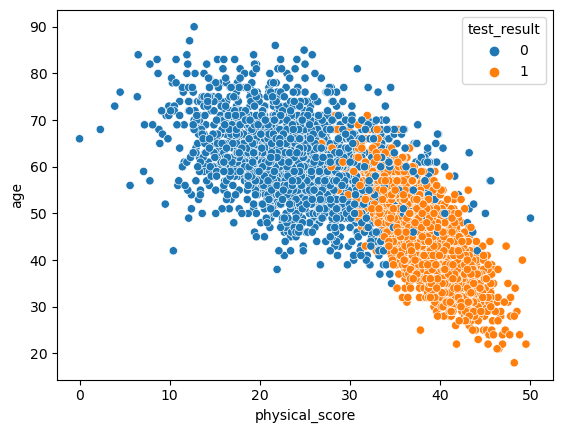

In [8]:
sns.scatterplot(x="physical_score",y="age",data=df,hue="test_result")

<Axes: >

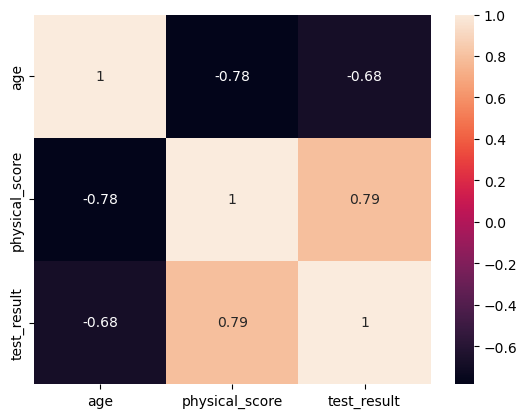

In [9]:
sns.heatmap(df.corr(),annot=True)

C:\Users\avich\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


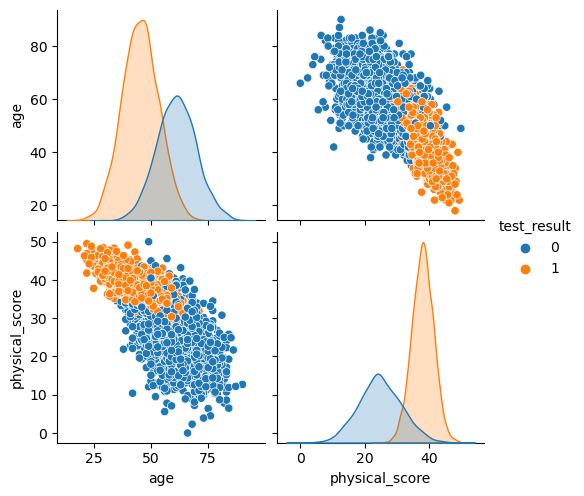

In [10]:
sns.pairplot(data=df,hue="test_result")

<Axes: xlabel='test_result', ylabel='age'>

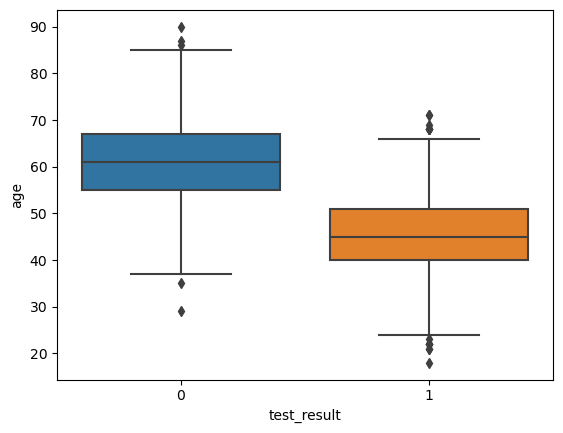

In [11]:
sns.boxplot(x="test_result",y="age",data=df)

<Axes: xlabel='test_result', ylabel='physical_score'>

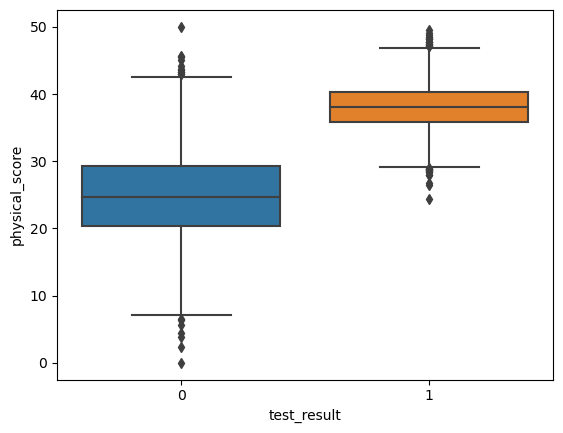

In [12]:
sns.boxplot(x="test_result",y="physical_score",data=df)

In [13]:
X=df.iloc[:,[0,1]]

In [14]:
X

,age,physical_score
0,33.0,40.7
1,50.0,37.2
2,52.0,24.7
3,56.0,31.0
4,35.0,42.9
...,...,...
4995,73.0,3.9
4996,57.0,33.9
4997,49.0,34.5
4998,38.0,46.4


In [15]:
y=df["test_result"]

In [16]:
y

0       1
1       1
2       0
3       0
4       1
       ..
4995    0
4996    1
4997    1
4998    1
4999    1
Name: test_result, Length: 5000, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=101)
scaler=StandardScaler()

In [19]:
scaled_X_train= scaler.fit_transform(X_train)
scaled_test= scaler.transform(X_test)

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
model=LogisticRegression()

In [22]:
model

LogisticRegression()

In [23]:
model.fit(X_train,y_train)

LogisticRegression()

In [24]:
y_prid=model.predict(X_test)

In [25]:
model1=LogisticRegression()

In [26]:
model1

LogisticRegression()

In [27]:
model1.fit(scaled_X_train,y_train)

LogisticRegression()

In [28]:
y_prid_new=model.predict(scaled_test)

C:\Users\avich\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [29]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [30]:
accuracy_score(y_test,y_prid)

0.93

In [35]:
accuracy_score(y_test,y_prid_new)

0.386

In [32]:
confusion_matrix(y_test,y_prid)

array([[172,  21],
       [ 14, 293]], dtype=int64)

In [34]:
confusion_matrix(y_test,y_prid_new)

array([[193,   0],
       [307,   0]], dtype=int64)

In [38]:
from sklearn.metrics import classification_report

In [42]:
print(classification_report(y_test,y_prid))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



In [43]:
print(classification_report(y_test,y_prid_new))

              precision    recall  f1-score   support

           0       0.39      1.00      0.56       193
           1       0.00      0.00      0.00       307

    accuracy                           0.39       500
   macro avg       0.19      0.50      0.28       500
weighted avg       0.15      0.39      0.22       500



C:\Users\avich\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\avich\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\avich\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
